In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('news_headlines.txt',sep='__',engine='python',header=None,names=['Text','Category'])
df

,Text,Category
0,BCCI plea on cooling-off period in the Supreme Court,Sports
1,Chelsea ‘long way’ from being title contenders: Frank Lampard,Sports
2,Jurgen Klopp urges Liverpool fans to stay home for trophy presentation,Sports
3,Chennai City to play remaining AFC Cup group matches in Maldives,Sports
4,Citi Open in Washington cancelled due to coronavirus disruption,Sports
...,...,...
9995,"People are more likely to contract Covid-19 at home, study finds",Science
9996,"Chinese Covid-19 vaccine shows results, India at trial stage with Covaxin: Top developments",Science
9997,Coronavirus antibodies fade fast but not necessarily protection,Science
9998,China's cosmic ambitions as seen from the skies,Science


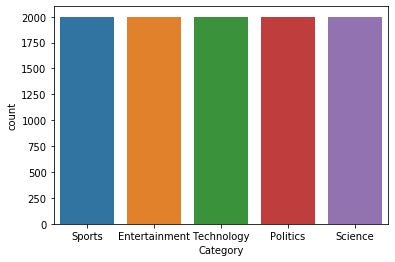

In [3]:
sns.countplot(df['Category']);

In [4]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')
porter = PorterStemmer()
snowball = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer() 



df['no_punct'] = df['Text'].apply(lambda x: tokenizer.tokenize(x.lower()))

stop_words = set(stopwords.words('english')) 
df['porter_text'] = df['no_punct'].apply(lambda x: ' '.join(porter.stem(item) for item in x if item not in stop_words))
df['snowball_text'] = df['no_punct'].apply(lambda x: ' '.join(snowball.stem(item) for item in x if item not in stop_words))
df['lemmatize_text'] = df['no_punct'].apply(lambda x: ' '.join(lemmatizer.lemmatize(item) for item in x if item not in stop_words))


In [5]:
df

,Text,Category,no_punct,porter_text,snowball_text,lemmatize_text
0,BCCI plea on cooling-off period in the Supreme Court,Sports,"[bcci, plea, on, cooling, off, period, in, the, supreme, court]",bcci plea cool period suprem court,bcci plea cool period suprem court,bcci plea cooling period supreme court
1,Chelsea ‘long way’ from being title contenders: Frank Lampard,Sports,"[chelsea, long, way, from, being, title, contenders, frank, lampard]",chelsea long way titl contend frank lampard,chelsea long way titl contend frank lampard,chelsea long way title contender frank lampard
2,Jurgen Klopp urges Liverpool fans to stay home for trophy presentation,Sports,"[jurgen, klopp, urges, liverpool, fans, to, stay, home, for, trophy, presentation]",jurgen klopp urg liverpool fan stay home trophi present,jurgen klopp urg liverpool fan stay home trophi present,jurgen klopp urge liverpool fan stay home trophy presentation
3,Chennai City to play remaining AFC Cup group matches in Maldives,Sports,"[chennai, city, to, play, remaining, afc, cup, group, matches, in, maldives]",chennai citi play remain afc cup group match maldiv,chennai citi play remain afc cup group match maldiv,chennai city play remaining afc cup group match maldives
4,Citi Open in Washington cancelled due to coronavirus disruption,Sports,"[citi, open, in, washington, cancelled, due, to, coronavirus, disruption]",citi open washington cancel due coronaviru disrupt,citi open washington cancel due coronavirus disrupt,citi open washington cancelled due coronavirus disruption
...,...,...,...,...,...,...
9995,"People are more likely to contract Covid-19 at home, study finds",Science,"[people, are, more, likely, to, contract, covid, at, home, study, finds]",peopl like contract covid home studi find,peopl like contract covid home studi find,people likely contract covid home study find
9996,"Chinese Covid-19 vaccine shows results, India at trial stage with Covaxin: Top developments",Science,"[chinese, covid, vaccine, shows, results, india, at, trial, stage, with, covaxin, top, developments]",chines covid vaccin show result india trial stage covaxin top develop,chines covid vaccin show result india trial stage covaxin top develop,chinese covid vaccine show result india trial stage covaxin top development
9997,Coronavirus antibodies fade fast but not necessarily protection,Science,"[coronavirus, antibodies, fade, fast, but, not, necessarily, protection]",coronaviru antibodi fade fast necessarili protect,coronavirus antibodi fade fast necessarili protect,coronavirus antibody fade fast necessarily protection
9998,China's cosmic ambitions as seen from the skies,Science,"[china, cosmic, ambitions, as, seen, from, the, skies]",china cosmic ambit seen sky,china cosmic ambit seen sky,china cosmic ambition seen sky


In [6]:
print(len(df[df['porter_text']==df['snowball_text']]))
print(len(df[df['porter_text']==df['lemmatize_text']]))
print(len(df[df['lemmatize_text']==df['snowball_text']]))

8686
560
585


In [7]:
def generate_wordcloud():
    for target in df['Category'].unique():
        new_df = df[df['Category']==target]
        cloud_text = ["".join(text) for text in new_df['lemmatize_text']]
        final_cloud_text = "".join(cloud_text)
        wordcloud = WordCloud(background_color="white",max_font_size=50, max_words=100).generate(final_cloud_text)

        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(target,fontsize=50)
        plt.axis("off")
        plt.show()

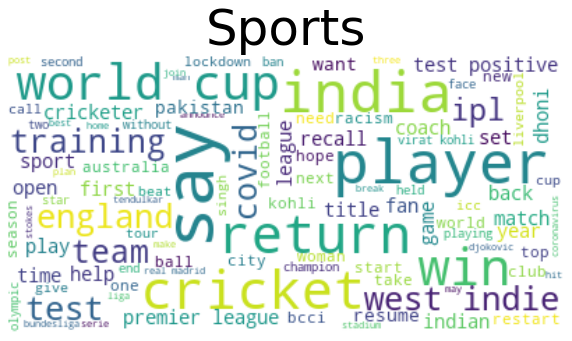

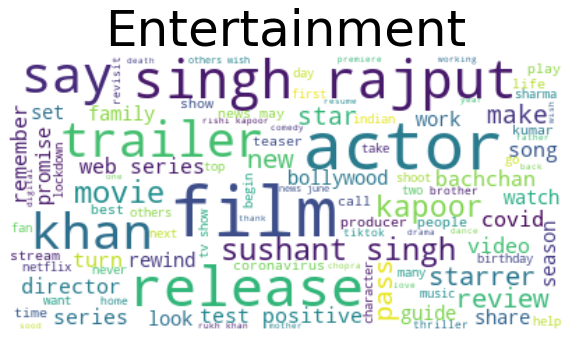

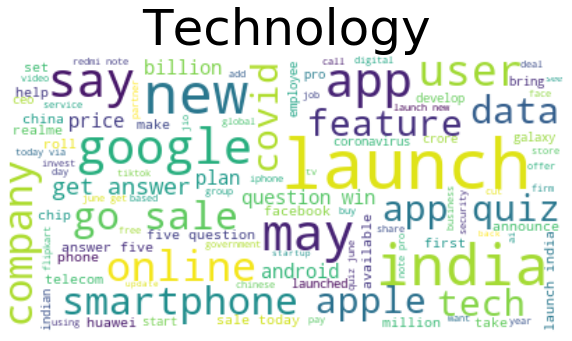

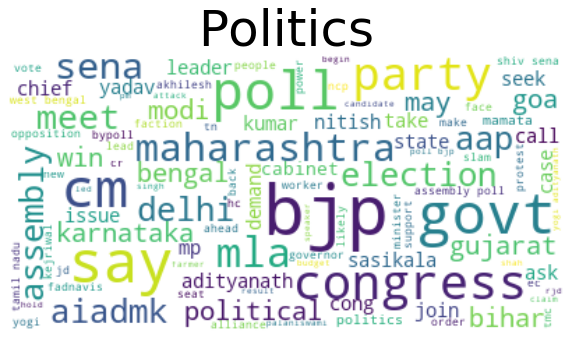

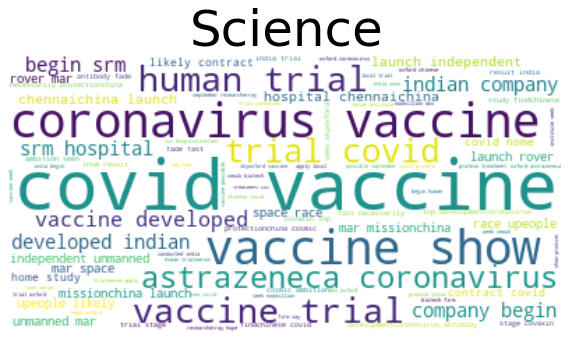

In [8]:
generate_wordcloud()

In [9]:
cv = CountVectorizer(ngram_range=(1,2))
X_porter = cv.fit_transform(df['porter_text']).toarray()
X_snowball = cv.fit_transform(df['snowball_text']).toarray()
X_lemmatize = cv.fit_transform(df['lemmatize_text']).toarray()
print(X_porter.shape)
print(X_snowball.shape)
print(X_lemmatize.shape)

(10000, 55373)
(10000, 55398)
(10000, 57451)


In [10]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_porter_tfidf = tfidf.fit_transform(df['porter_text']).toarray()
X_snowball_tfidf = tfidf.fit_transform(df['snowball_text']).toarray()
X_lemmatize_tfidf = tfidf.fit_transform(df['lemmatize_text']).toarray()
print(X_porter_tfidf.shape)
print(X_snowball_tfidf.shape)
print(X_lemmatize_tfidf.shape)

(10000, 55373)
(10000, 55398)
(10000, 57451)


In [11]:
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Category'])

In [12]:
y = df['Target'].values

In [13]:
def model_accuracy(X):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1) 
    nb = MultinomialNB(alpha=0.45)
    nb.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy: ',accuracy_score(y_test, y_pred))
    plot_confusion_matrix(nb, X_test, y_test);
    

Bag Of Words & PorterStemmer
Accuracy:  0.9625


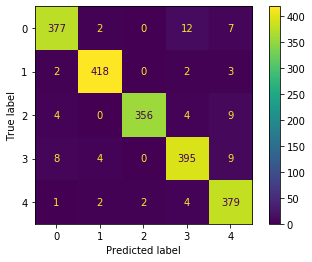

In [14]:
print('Bag Of Words & PorterStemmer')
model_accuracy(X_porter)

Bag Of Words & SnowballStemmer
Accuracy:  0.9625


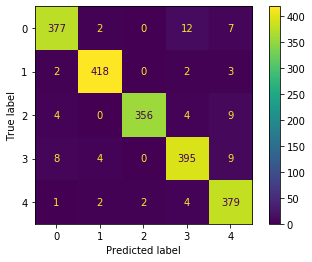

In [15]:
print('Bag Of Words & SnowballStemmer')
model_accuracy(X_snowball)

Bag Of Words & Lemmatizer
Accuracy:  0.962


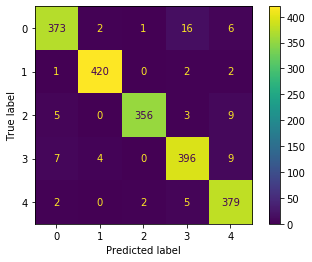

In [16]:
print('Bag Of Words & Lemmatizer')
model_accuracy(X_lemmatize)

TFIDF & PorterStemmer
Accuracy:  0.962


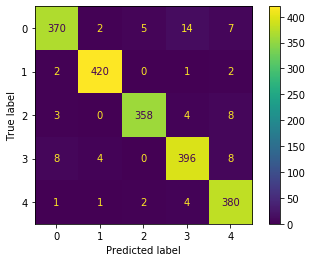

In [17]:
print('TFIDF & PorterStemmer')
model_accuracy(X_porter_tfidf)

TFIDF & SnowballStemmer
Accuracy:  0.961


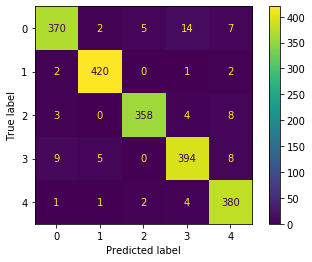

In [18]:
print('TFIDF & SnowballStemmer')
model_accuracy(X_snowball_tfidf)

TFIDF & Lemmatizer
Accuracy:  0.961


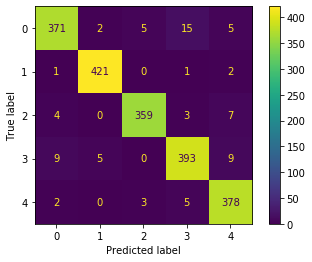

In [19]:
print('TFIDF & Lemmatizer')
model_accuracy(X_lemmatize_tfidf)

In [20]:
def Kfold(X):
    accuracy=[]
    nb = MultinomialNB(alpha=0.45)

    skfold = StratifiedKFold(n_splits=10,random_state=None)
    skfold.get_n_splits(X,y)
    for train_index, test_index in skfold.split(X,y):
        X_train,X_test = X[train_index], X[test_index]
        y_train,y_test = y[train_index], y[test_index]

        nb.fit(X_train,y_train)
        y_pred = nb.predict(X_test)
        score = accuracy_score(y_pred,y_test)
        accuracy.append(score)
    print('Accuracy: ',(np.array(accuracy)).mean())
    plot_confusion_matrix(nb, X_test, y_test);




Bag Of Words & PorterStemmer
Accuracy:  0.9490999999999999


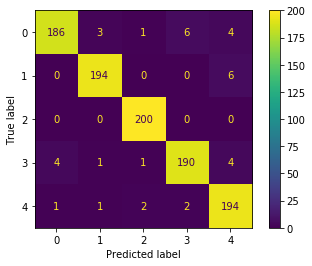

In [21]:
print('Bag Of Words & PorterStemmer')
Kfold(X_porter)

Bag Of Words & SnowballStemmer
Accuracy:  0.9489000000000001


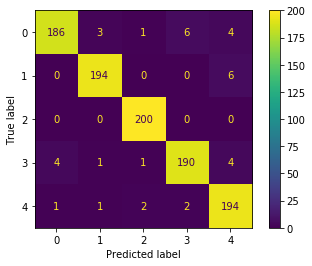

In [22]:
print('Bag Of Words & SnowballStemmer')
Kfold(X_snowball)

Bag Of Words & Lemmatizer
Accuracy:  0.9481999999999999


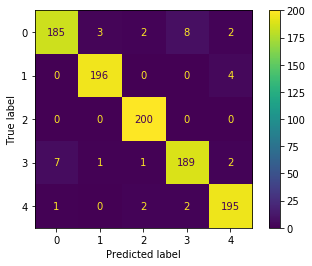

In [23]:
print('Bag Of Words & Lemmatizer')
Kfold(X_lemmatize)

TFIDF & PorterStemmer
Accuracy:  0.9471


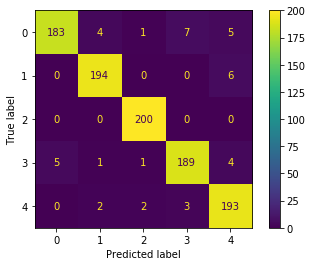

In [24]:
print('TFIDF & PorterStemmer')
Kfold(X_porter_tfidf)

TFIDF & SnowballStemmer
Accuracy:  0.9471999999999999


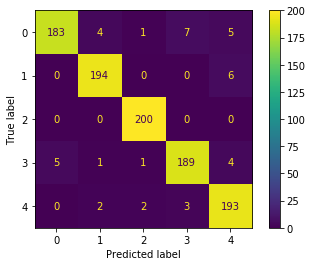

In [25]:
print('TFIDF & SnowballStemmer')
Kfold(X_snowball_tfidf)

TFIDF & Lemmatizer
Accuracy:  0.9469999999999998


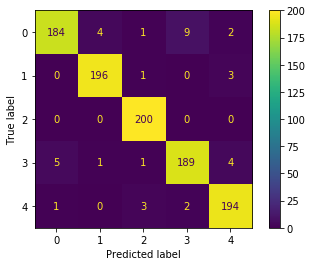

In [26]:
print('TFIDF & Lemmatizer')
Kfold(X_lemmatize_tfidf)